<h2>Generate stochastic variables

<h3>Random Number Generator

To calculate a random number the next formula is being used:<br>
*Xi+1 =  (a.Xi + c) mod m*

In [5]:
def uniform_rng(steps,a,c,m,begin_x,show_his=False):
    x=begin_x
    lst=[]
    for i in range(steps):
        x=(a*x+c)%m
        lst.append(x)
    if show_his:
        plt.hist([i for i in lst],bins=50)
        plt.show()
    return lst
        

In [7]:
random_values=uniform_rng(10000,421,325,100000,1000,show_his=False)

<h3>Convert from Uniform to a Normal Distribution

In [40]:
from scipy.stats import norm
from scipy.stats import normaltest

We can evaluate a normal distribution with the following steps:<br>
- Initialize cumulative normal function (norm.cdf) <br>
- Initialize inverse of cumulative normal function (norm.ppf)<br>
- Find a random value from a uniform distribution (uniform_rng)<br>
- Convert random value to numbers between 0 and 1<br>
- Find value from normal distribution given the random value by using the norm.ppf function<br>

In [35]:
def uniform_to_normal(lst,show_his=False):
    new_lst=[]
    for random_value in lst:
        x=random_value/(max(lst))
        x += (-x+0.5)*0.00001
        new_x=norm.ppf(x,loc=1,scale=1)
        new_lst.append(new_x)
    if show_his:
        plt.hist([i for i in new_lst],bins=50)
        plt.show()
    return new_lst

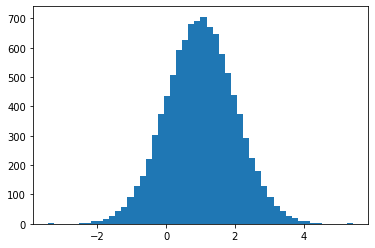

In [36]:
normal_values=uniform_to_normal(random_values,show_his=True)

<h3>Validate Normal Distribution

In [41]:
normaltest(normal_values)

NormaltestResult(statistic=3.1963489515558363, pvalue=0.20226542159739103)

The p value is 20% (more than 5% which), so the data seems to resembling a normal distribution. 